# Housing Dataset Regression
This datasets is for studying regession algorithm

In [1]:
from sklearn.datasets import fetch_california_housing

In [2]:
cali = fetch_california_housing()
print('Keys of datasets: \n{}'.format(cali.keys()))

Keys of datasets: 
dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [3]:
print("features name: \n{}".format(cali['feature_names']))

features name: 
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [5]:
print("data descrption: \n{}".format(cali['DESCR']))

data descrption: 
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, us

In [6]:
print("data frame: \n{}".format(cali['frame']))

data frame: 
None


In [7]:
print("dataset data: \n{}".format(cali['data'].shape))

dataset data: 
(20640, 8)


In [31]:
X_train ,X_test, y_train, y_test = train_test_split(
    cali['data'], cali['target'], random_state=0
)

In [35]:
knn_reg = KNeighborsRegressor(n_neighbors=3)
knn_reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [36]:
y_pred = knn_reg.predict(X_test)
score = np.mean(y_pred==y_test)
print('prediction score: \n{}'.format(score))

prediction score: 
0.0015503875968992248


In [14]:
import pandas as pd
cali_df = pd.DataFrame(X_train,columns=cali['feature_names'])
print(cali_df)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      3.3926      32.0  5.575439   1.063743      4951.0  2.895322     38.60   
1      2.3571      52.0  6.008130   1.067751       907.0  2.457995     40.58   
2      6.2885       6.0  6.909449   1.102362       664.0  2.614173     35.47   
3      3.6618      36.0  4.483660   0.964052       774.0  2.529412     34.22   
4      1.2778      42.0  3.461538   1.149798       890.0  3.603239     34.00   
...       ...       ...       ...        ...         ...       ...       ...   
15475  1.7823      17.0  4.055046   1.087156      1079.0  2.474771     33.76   
15476  8.5608      42.0  6.788462   1.011538       753.0  2.896154     34.42   
15477  1.1326      42.0  4.890785   1.006826       775.0  2.645051     33.93   
15478  2.6322      10.0  4.991614   0.951782      1323.0  2.773585     33.73   
15479  2.3036      35.0  4.620513   1.176923      1009.0  2.587179     37.79   

       Longitude  
0        -121.30  
1

In [20]:
# create Correlation map
cali_df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.124221,0.319823,-0.058308,0.004869,0.023474,-0.076846,-0.017789
HouseAge,-0.124221,1.000000,-0.150428,-0.072774,-0.295488,0.015203,0.009088,-0.105493
AveRooms,0.319823,-0.150428,1.000000,0.853619,-0.074164,-0.003943,0.108921,-0.031621
AveBedrms,-0.058308,-0.072774,0.853619,1.000000,-0.066350,-0.005216,0.071617,0.008817
Population,0.004869,-0.295488,-0.074164,-0.066350,1.000000,0.077475,-0.105922,0.097999
AveOccup,0.023474,0.015203,-0.003943,-0.005216,0.077475,1.000000,0.005771,-0.000110
Latitude,-0.076846,0.009088,0.108921,0.071617,-0.105922,0.005771,1.000000,-0.925420
Longitude,-0.017789,-0.105493,-0.031621,0.008817,0.097999,-0.000110,-0.925420,1.000000


We can see that the prediction using KN regressor yield a really low accuracy. And the more neighbours, the less accurate our data would be

In [42]:
df = cali_df.reset_index()

In [43]:
cali_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,3.3926,32.0,5.575439,1.063743,4951.0,2.895322,38.60,-121.30
1,2.3571,52.0,6.008130,1.067751,907.0,2.457995,40.58,-124.26
2,6.2885,6.0,6.909449,1.102362,664.0,2.614173,35.47,-118.92
3,3.6618,36.0,4.483660,0.964052,774.0,2.529412,34.22,-118.43
4,1.2778,42.0,3.461538,1.149798,890.0,3.603239,34.00,-118.28
...,...,...,...,...,...,...,...,...
15475,1.7823,17.0,4.055046,1.087156,1079.0,2.474771,33.76,-117.88
15476,8.5608,42.0,6.788462,1.011538,753.0,2.896154,34.42,-119.63
15477,1.1326,42.0,4.890785,1.006826,775.0,2.645051,33.93,-118.26
15478,2.6322,10.0,4.991614,0.951782,1323.0,2.773585,33.73,-117.16


In [47]:
df['results'] = y_train

In [59]:
df

,index,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,results
0,0,3.3926,32.0,5.575439,1.063743,4951.0,2.895322,38.60,-121.30,3.81300
1,1,2.3571,52.0,6.008130,1.067751,907.0,2.457995,40.58,-124.26,3.29300
2,2,6.2885,6.0,6.909449,1.102362,664.0,2.614173,35.47,-118.92,1.85400
3,3,3.6618,36.0,4.483660,0.964052,774.0,2.529412,34.22,-118.43,5.00001
4,4,1.2778,42.0,3.461538,1.149798,890.0,3.603239,34.00,-118.28,0.97500
...,...,...,...,...,...,...,...,...,...,...
15475,15475,1.7823,17.0,4.055046,1.087156,1079.0,2.474771,33.76,-117.88,1.44600
15476,15476,8.5608,42.0,6.788462,1.011538,753.0,2.896154,34.42,-119.63,1.59400
15477,15477,1.1326,42.0,4.890785,1.006826,775.0,2.645051,33.93,-118.26,2.89300
15478,15478,2.6322,10.0,4.991614,0.951782,1323.0,2.773585,33.73,-117.16,4.84600


Text(0.5, 0, 'index')

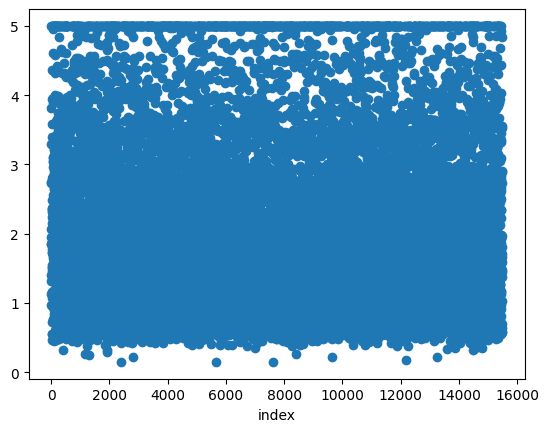

In [58]:
plt.scatter(df['index'],df['results'])
plt.xlabel("index")

this is partial due to the output result